# Art in Pittsburgh
#### By: Liam Sullivan

One of the metrics we used to determine the best neighborhood is the amount of street art in each neighborhood, as it adds a new layer of interest to otherwise bland streets and buildings.

In [13]:
# loading pandas and numpy libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Let's load in our data now.

In [53]:
art = pd.read_csv("art.csv")
art

,id,name,title,artist_name,art_type,park,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,812728309,1001,Oakwood Road Monument,NaN,NaN,NaN,NaN,Oakwood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,19-Jan,40.429192,-80.066225
1,188255168,1002,Rooster Waiting For The Streetcar,James Simon,Modern and Contemporary Art,NaN,NaN,Elliott,2.0,20.0,4.200356e+10,5.0,20.0,6.0,17-Jan,40.442926,-80.039711
2,2032091917,129,Middle East Memorial Plaque,NaN,War Memorials,NaN,NaN,Central Business District,6.0,1.0,4.200302e+10,6.0,1.0,2.0,4-Jan,40.438092,-79.996852
3,1447629273,143,L'Enfant,Paul Roger-Bloche,Historic Art,NaN,NaN,Carrick,4.0,29.0,4.200329e+10,3.0,29.0,3.0,23-Apr,40.388748,-79.986497
4,1935017944,148,Veterans Memorial (Brookline),NaN,War Memorials,Brookline Monument,NaN,Brookline,4.0,19.0,4.200319e+10,5.0,19.0,6.0,26-Apr,40.391721,-80.016981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,1089921133,WM00099000,17th Ward Veterans Memorial,NaN,Non-City Owned,NaN,NaN,South Side Flats,3.0,17.0,4.200317e+10,3.0,17.0,3.0,24-Apr,40.428635,-79.980443
195,191395610,WM00101000,Saint Josephat Honor Roll,NaN,Non-City Owned,NaN,NaN,South Side Slopes,3.0,16.0,4.200316e+10,3.0,16.0,3.0,22-Apr,40.423129,-79.973486
196,628976107,WM00102000,World War II Momument,NaN,Non-City Owned,NaN,NaN,Spring Garden,1.0,26.0,4.200324e+10,1.0,26.0,1.0,11-Jan,40.471780,-79.986670
197,1309894649,WM00105000,Korean War Veterans Memorial,R. Allan Christianson (Architect),War Memorials,Northshore Riverfront Park,NaN,North Shore,1.0,22.0,4.200398e+10,6.0,22.0,1.0,7-Jan,40.445726,-80.008082


There is a lot of information in this file, so lets isolate it to neighborhoods and number of art pieces per neighborhood.

In [42]:
values = art['neighborhood'].value_counts()
values

Central Business District    27
Squirrel Hill South          20
Allegheny Center             18
Highland Park                10
South Side Flats              9
North Shore                   8
Beechview                     7
Shadyside                     6
Central Oakland               5
Lower Lawrenceville           5
Brighton Heights              5
Spring Hill-City View         4
Crawford-Roberts              3
Greenfield                    3
Elliott                       3
Beltzhoover                   3
Hazelwood                     3
South Side Slopes             3
Duquesne Heights              3
Point Breeze                  3
Garfield                      2
Upper Hill                    2
Central Lawrenceville         2
Spring Garden                 2
Mount Washington              2
Allentown                     2
Strip District                2
Lincoln-Lemington-Belmar      2
Squirrel Hill North           2
East Allegheny                2
West End                      2
Perry No

This is a lot of data to sift through though, so lets take the best 5 and put them in a bar graph.

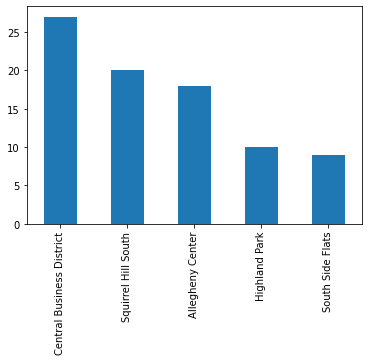

In [43]:
high = values.head(5)
high.plot.bar(x = values[0], y = values[1])

## Geographical Map

Let's try interpreting this data in a way that's a little easier to read.

In [54]:
# read file
import geopandas
import shapely
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
# data -> map
neighborhoodMap = neighborhoods.merge(values, how = 'left',left_on = 'hood', right_on = 'neighborhood')
neighborhoodMap.plot(column = 'id',cmap = 'Blues', edgecolor ='black',figsize = (15,10), legend = True)

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

The neighborhoods that contain no art pieces are missing borders though. Let's add them back.

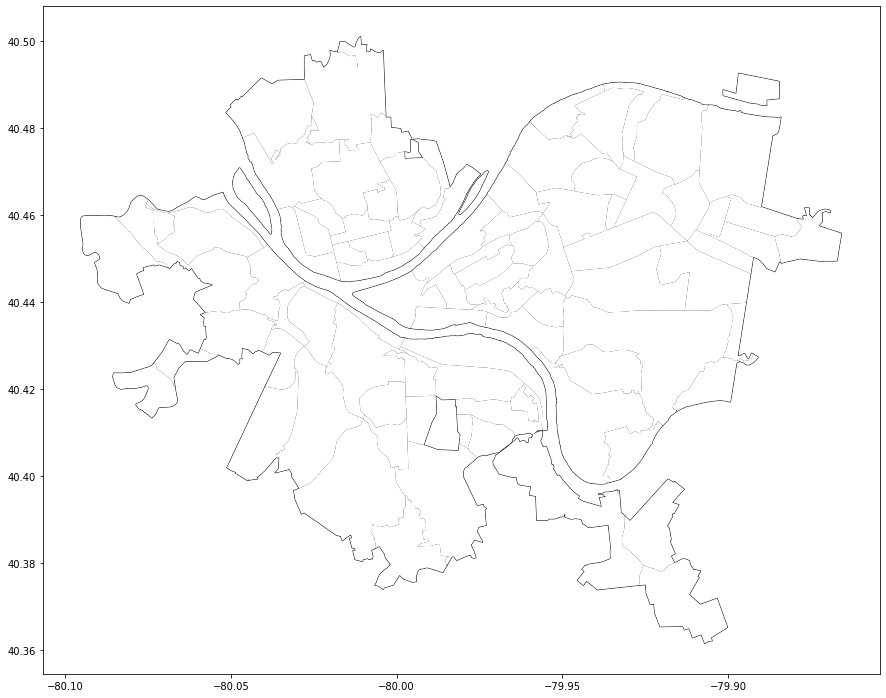

In [50]:
neighborhoodBorders=neighborhoodMap.plot(ax = neighborhoods.plot(figsize=(15,15), edgecolor = 'black'),marker = '*', color ='white', markersize = 5)

## Best Neighborhood

According to our street art data, **Downtown Pittsburgh** is the "prettiest" neighborhood in Pittsburgh without accounting for other metrics.